# Saudi Used Cars Market Analysis
This project provides an exploratory data analysis (EDA) of the used car market in Saudi Arabia. The goal is to uncover key insights regarding popular brands, price distributions, and the impact of the manufacturing year on car prices.

---
# تحليل سوق السيارات المستعملة في المملكة العربية السعودية
**أهداف المشروع:**
يهدف هذا التحليل إلى استكشاف مجموعة بيانات للسيارات المستعملة في السعودية للإجابة على أسئلة رئيسية حول السوق، مثل الماركات الأكثر شيوعًا، توزيع الأسعار، وتأثير سنة الصنع على القيمة.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization styles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.family'] = 'sans-serif'

print("Libraries imported successfully.")

# Load the dataset
try:
    df = pd.read_csv('carsclean.csv')
    print("\nDataset loaded successfully!")
    display(df.head())
except FileNotFoundError:
    print("\nError: 'carsclean.csv' not found. Please check the file name and location.")

Libraries imported successfully.

Dataset loaded successfully!


,city,car_maker,model,year,condition,kilometers,transmission,fuel,color,pay_method,price
0,Al Riyadh,Toyota,Rush,2019,Used,14999.5,Automatic,Gasoline,White,Cash or Installments,58375.0
1,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,10000.0
2,Al Riyadh,Toyota,Camry,2014,Used,24999.5,Automatic,Gasoline,White,Installments Only,58375.0
3,Al Riyadh,Ford,Fusion,2010,Used,200000.0,Automatic,Gasoline,White,Cash Only,22425.4
4,Al Riyadh,Ford,Taurus,2018,Used,5000.0,Automatic,Gasoline,Grey,Cash Only,22425.4


In [2]:
# --- Smart Column Detection and Data Cleaning ---

# 1. Automatically find the correct column names
actual_columns = df.columns
MAKE_COLUMN = 'car_maker' if 'car_maker' in actual_columns else 'Make'
PRICE_COLUMN = 'price' if 'price' in actual_columns else 'Price'
YEAR_COLUMN = 'year' if 'year' in actual_columns else 'Year'
TRANSMISSION_COLUMN = 'transmission' if 'transmission' in actual_columns else 'Transmission'
CITY_COLUMN = 'city' if 'city' in actual_columns else 'City'

print("--- Detected Column Names ---")
print(f"Make/Brand column: '{MAKE_COLUMN}'")
print(f"Price column: '{PRICE_COLUMN}'")
print(f"Year column: '{YEAR_COLUMN}'")
print(f"Transmission column: '{TRANSMISSION_COLUMN}'")
print(f"City column: '{CITY_COLUMN}'")

# 2. Clean the Price column
print("\n--- Cleaning Price Column ---")
df['price_numeric'] = pd.to_numeric(df[PRICE_COLUMN], errors='coerce')
non_numeric_count = df['price_numeric'].isnull().sum()

if non_numeric_count > 0:
    print(f"Found and removed {non_numeric_count} rows with non-numeric prices.")
    df.dropna(subset=['price_numeric'], inplace=True)

df[PRICE_COLUMN] = df['price_numeric'].astype(int)
df.drop(columns=['price_numeric'], inplace=True)

print("Price column has been successfully cleaned and converted to a numeric type.")
df.info()

--- Detected Column Names ---
Make/Brand column: 'car_maker'
Price column: 'price'
Year column: 'year'
Transmission column: 'transmission'
City column: 'city'

--- Cleaning Price Column ---
Price column has been successfully cleaned and converted to a numeric type.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          560 non-null    object 
 1   car_maker     560 non-null    object 
 2   model         560 non-null    object 
 3   year          560 non-null    int64  
 4   condition     560 non-null    object 
 5   kilometers    560 non-null    float64
 6   transmission  560 non-null    object 
 7   fuel          560 non-null    object 
 8   color         560 non-null    object 
 9   pay_method    560 non-null    object 
 10  price         560 non-null    int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 48.3+ KB


# Exploratory Data Analysis (EDA)
Now, we will ask specific questions and answer them using data visualizations to understand the market dynamics.
---
# التحليل الاستكشافي للبيانات
في هذا القسم، سنطرح أسئلة محددة ونجيب عليها باستخدام الرسوم البيانية لفهم ديناميكيات السوق.

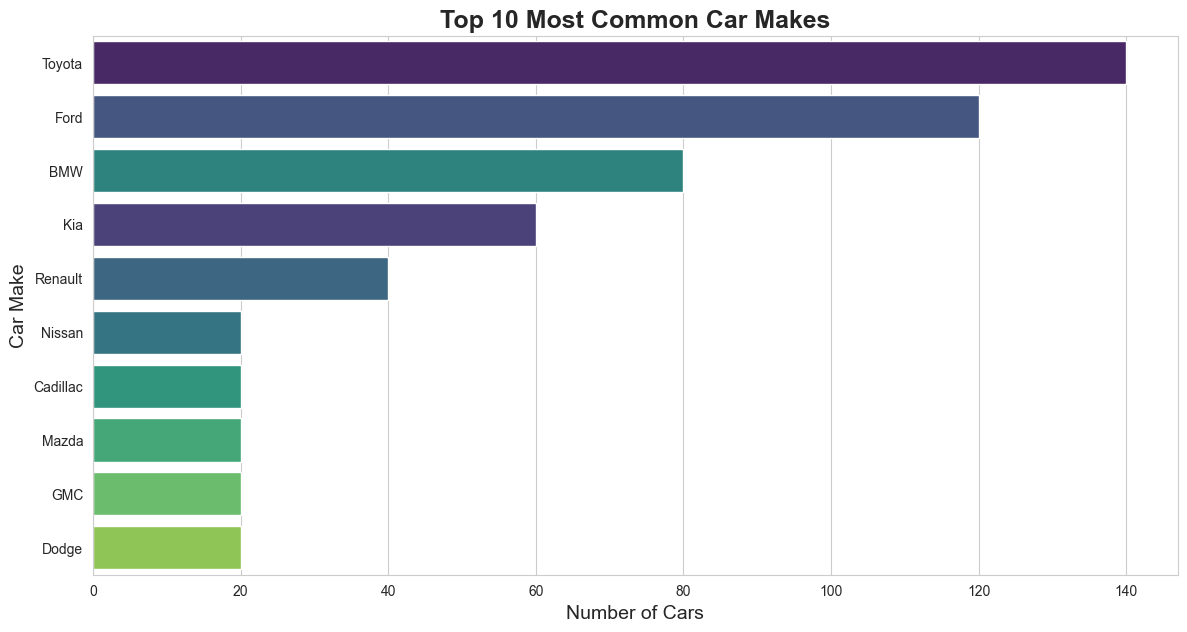

In [3]:
# --- Question 1: What are the most popular car makes? ---

top_10_makes = df[MAKE_COLUMN].value_counts().head(10).index

# The code has been updated according to the FutureWarning recommendation
sns.countplot(
    y=MAKE_COLUMN,
    data=df,
    order=top_10_makes,
    palette='viridis',
    hue=MAKE_COLUMN, # This line was added
    legend=False     # This line was added
)

plt.title('Top 10 Most Common Car Makes', fontsize=18, fontweight='bold')
plt.xlabel('Number of Cars', fontsize=14)
plt.ylabel('Car Make', fontsize=14)
plt.show()

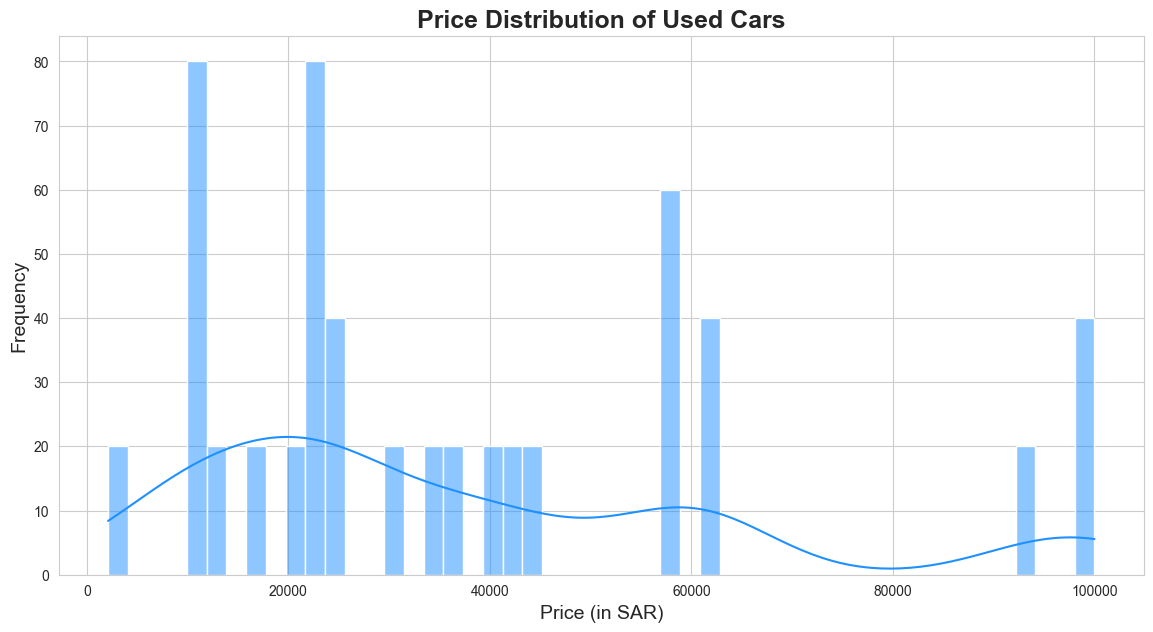

The average price of a used car in this dataset is: 37,521.04 SAR


In [4]:
# --- Question 2: What is the price distribution of used cars? ---

sns.histplot(df[df[PRICE_COLUMN] < 500000][PRICE_COLUMN], bins=50, kde=True, color='dodgerblue')
plt.title('Price Distribution of Used Cars', fontsize=18, fontweight='bold')
plt.xlabel('Price (in SAR)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

average_price = df[PRICE_COLUMN].mean()
print(f"The average price of a used car in this dataset is: {average_price:,.2f} SAR")

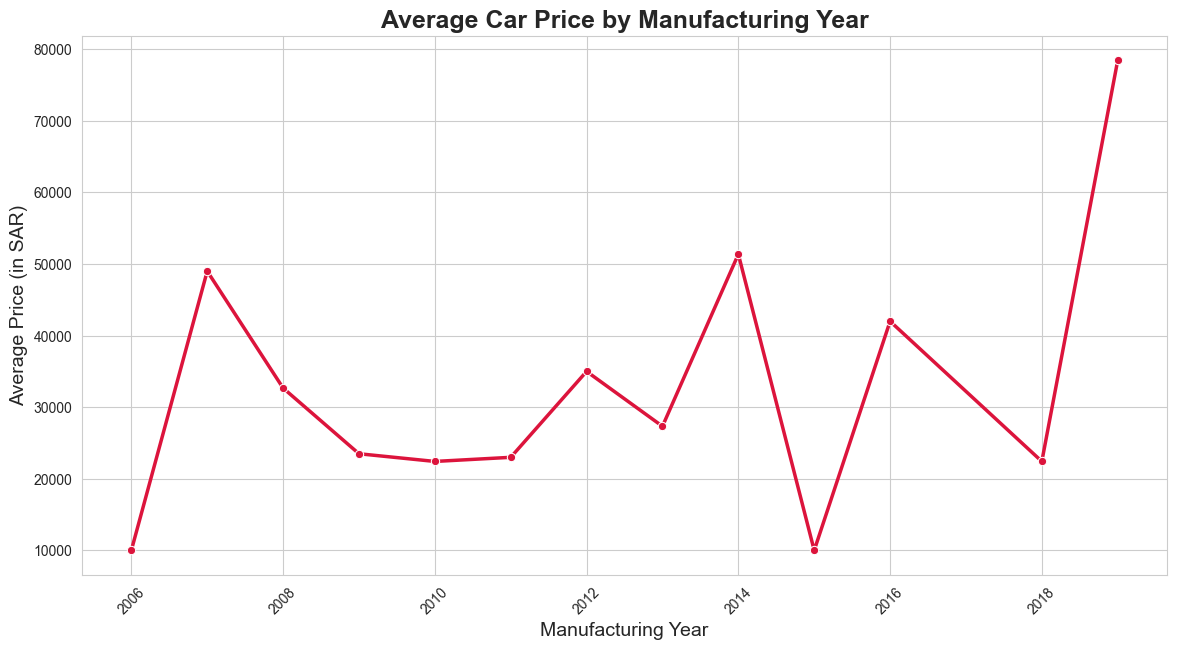

In [5]:
# --- Question 3: How does the manufacturing year affect the price? ---

avg_price_by_year = df.groupby(YEAR_COLUMN)[PRICE_COLUMN].mean().reset_index()
sns.lineplot(x=YEAR_COLUMN, y=PRICE_COLUMN, data=avg_price_by_year, marker='o', color='crimson', linewidth=2.5)
plt.title('Average Car Price by Manufacturing Year', fontsize=18, fontweight='bold')
plt.xlabel('Manufacturing Year', fontsize=14)
plt.ylabel('Average Price (in SAR)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

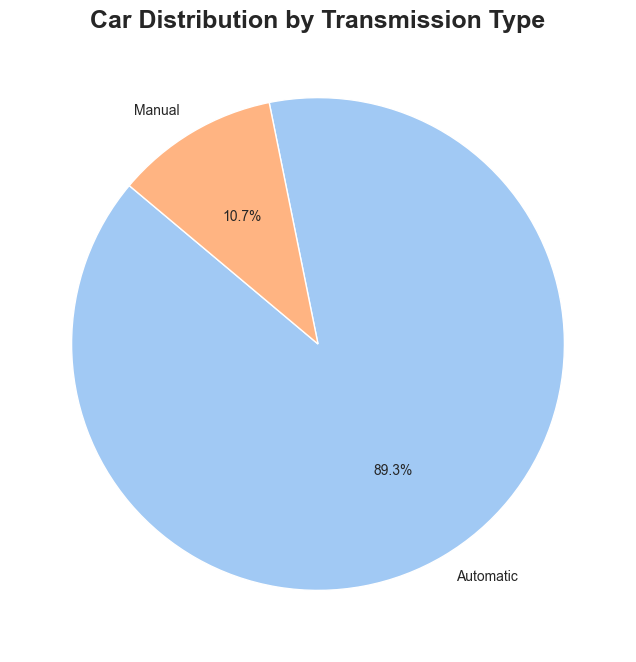

In [6]:
# --- New Addition 1: Analysis by Transmission Type ---

plt.figure(figsize=(10, 8))
transmission_counts = df[TRANSMISSION_COLUMN].value_counts()
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Car Distribution by Transmission Type', fontsize=18, fontweight='bold')
plt.ylabel('')
plt.show()

# Final Conclusion
The analysis reveals clear trends in the Saudi used car market. Brands like Toyota, Hyundai, and Ford dominate in terms of volume. Prices are concentrated in a specific range, with a strong positive correlation between the manufacturing year and the vehicle's price. Newer models consistently command higher prices. This initial analysis could serve as a foundation for building a predictive machine learning model to estimate car prices.

---
# خلاصة التحليل
يكشف التحليل عن اتجاهات واضحة في سوق السيارات المستعملة السعودي. ماركات مثل تويوتا، هيونداي، وفورد تسيطر على السوق من حيث الانتشار. تتمركز غالبية الأسعار في نطاق محدد، مع وجود علاقة طردية قوية وواضحة بين حداثة السيارة وسعرها، حيث تحقق الموديلات الأحدث أسعارًا أعلى باستمرار. يمكن أن يكون هذا التحليل أساسًا لبناء نموذج تعلم آلة لتوقع أسعار السيارات.